In [1]:
import seaborn as sns

In [2]:
diamonds = sns.load_dataset('diamonds')

In [26]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [8]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [17]:
ideal = diamonds[diamonds['cut'] == "Ideal"]
ideal.reset_index(inplace=True)

ideal

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
2,13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
3,16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
4,39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78
...,...,...,...,...,...,...,...,...,...,...,...
21546,53925,0.79,Ideal,I,SI1,61.6,56.0,2756,5.95,5.97,3.67
21547,53926,0.71,Ideal,E,SI1,61.9,56.0,2756,5.71,5.73,3.54
21548,53929,0.71,Ideal,G,VS1,61.4,56.0,2756,5.76,5.73,3.53
21549,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50


In [18]:
premium = diamonds[diamonds['cut'] == "Premium"]
premium.reset_index(inplace=True)

premium

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,12,0.22,Premium,F,SI1,60.4,61.0,342,3.88,3.84,2.33
3,14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
4,15,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68
...,...,...,...,...,...,...,...,...,...,...,...
13786,53928,0.79,Premium,E,SI2,61.4,58.0,2756,6.03,5.96,3.68
13787,53930,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
13788,53931,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
13789,53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58


In [15]:
stats.ttest_ind(ideal['price'], premium['price'])

Ttest_indResult(statistic=-25.650910588183198, pvalue=8.585274269295433e-144)

In [20]:
stats.f_oneway(diamonds['price'][diamonds['cut'] == "Premium"],
              diamonds['price'][diamonds['cut'] == "Ideal"],
              diamonds['price'][diamonds['cut'] == "Good"])

F_onewayResult(statistic=335.8568601267539, pvalue=2.2034069412537372e-145)

In [21]:
#multivariate analysis of carat and price
np.cov(diamonds['carat'], diamonds['price'])

array([[2.24686660e-01, 1.74276536e+03],
       [1.74276536e+03, 1.59156294e+07]])

In [22]:
np.corrcoef(diamonds['carat'], diamonds['price'])

array([[1.       , 0.9215913],
       [0.9215913, 1.       ]])

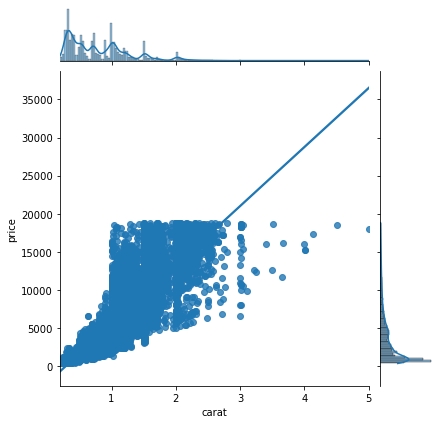

In [33]:
sns.jointplot(x='carat', y='price', data=diamonds, kind='reg')

In [24]:
diamonds.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

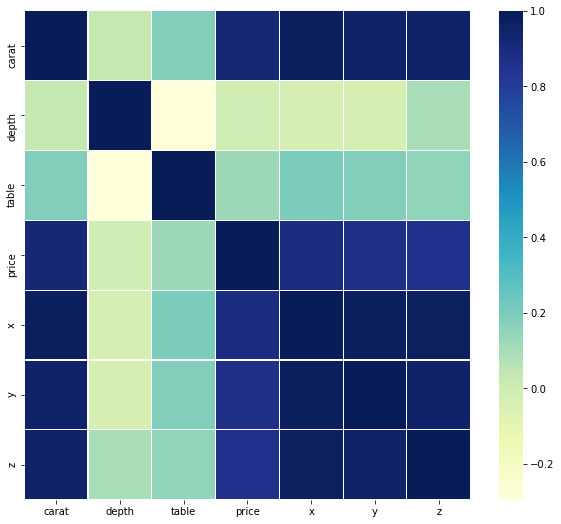

In [27]:
corrmat = diamonds.corr()
f, ax = plt.subplots(figsize=(10,9))

sns.heatmap(corrmat, ax=ax, cmap="YlGnBu", linewidths=0.1)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [41]:
arr = diamonds[['carat', 'price']].values
arr = StandardScaler().fit_transform(arr)

In [42]:
pca = PCA(n_components=2)
pca.fit(arr)

PCA(n_components=2)

In [43]:
print(f'PCA Components: \n {pca.components_} \n')
print(f'PCA Explained Variance: \n {pca.explained_variance_} \n')
print(f'PCA Explained Variance Ratio: \n {pca.explained_variance_ratio_} \n')

PCA Components: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]] 

PCA Explained Variance: 
 [1.92162693 0.07841015] 

PCA Explained Variance Ratio: 
 [0.96079565 0.03920435] 



(-1.7688346633934828, 9.393451270465086, -1.135921840242235, 3.964265139147429)

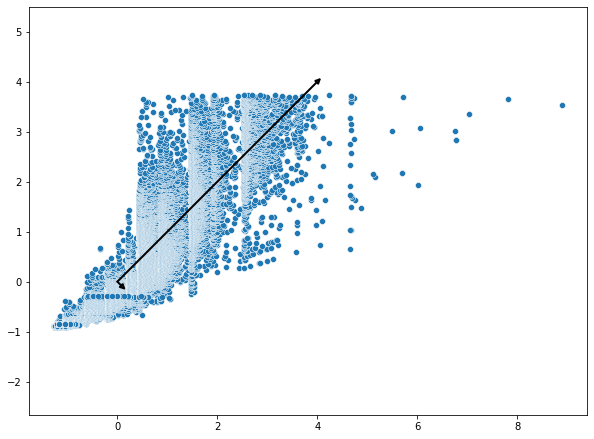

In [44]:
fig = plt.figure(figsize=(10, 7.5))
sns.scatterplot(x=arr[:, 0], y=arr[:, 1])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * length
    ax = plt.gca()
    ax.annotate('', pca.mean_ + v, pca.mean_, arrowprops=dict(arrowstyle='-|>',
                                                              linewidth=2,
                                                              shrinkA=0, 
                                                              shrinkB=0))
    
plt.axis('equal')